# What are the main drivers of the level of damage ? 

The goal of this part is to determine which variable explains the level of damage as an output of the damage function. To do so, we will proceed to an econometric regression of the level of damage by other explanatory variables. 

The general idea is that the quantitative level of damage given by the model is driven by multiple factors : 

- physical drivers, such as the level of climate change (temperature change, radiative forcing, etc.)
- methodological drivers, such as the choice of this or that modelling choice
- ethical drivers, such as the way spatial, social or generational equities are represented

In order to quantitatively assess the role of each factor in the model, we will perform linear regressions, in which the level of damage is assumed to be explained by a set of explanatory variables. These explanatory variables have been choosen or designed to be representative of one of the above mentionned choices. 

The general form is the following : 

$$


\begin{align*}
\text{damage} = & \ \beta_0  + \underbrace{\beta_1 \cdot \text{temperature} + \beta_2 \cdot \text{radiative forcing}}_\text{Physical variables}  + \underbrace{\beta_3 \cdot \text{equation}}_\text{Methodological variables} \\
& + \underbrace{\beta_1 \cdot \text{exponent} + \beta_2 \cdot \text{normalisation constant}}_\text{Ethical variables}  + \epsilon
\end{align*}

$$

where:
- $\text{damage}$ is the level of damage
- $\beta_0$ is the intercept term
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients of the variables
- $\text{exponent}, \text{normalisation constant}, \ldots, \text{temperature}$ are the independent variables
- $\epsilon$ is the error term

### Preparation of the data

In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

xr.set_options(display_expand_attrs=False, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

In [4]:
# This cell stores the variables for the rest of the script, so it is easier to change if needed
data_file_path = '../../../results/batch/run_ds.nc'

First, we have to load the data that came as an output of the model. Variables of interest are stored in a netcdf file (.nc), that we will load as a dataset, and convert to a pandas dataframe. 

In [5]:
variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_eq_total_deaths',
       'fund_tot_eq_fund_total_impact', 'fund_tot_total_damage',
       'witness_tot_eq_witness_total_impact', 'time',
       'temperature_change', 'total_population', 'extra_extra_exponent',
       'extra_extra_normalisation_constant', 'total_radiative_forcing']

damage_variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_total_damage',
       'fund_tot_eq_fund_total_impact', 'witness_tot_eq_witness_total_impact']      

ds = xr.open_dataset(data_file_path)
df = ds[variables].to_dataframe().reset_index()

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


We now have a dataframe : 

In [6]:
df

,Run,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_monetary_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing
0,0,2005.0,AUSTRIA,inf,inf,NaN,NaN,NaN,NaN,NaN,inf,0.845000,6.541007e+09,-3.500198,10386.656605,1.714491
1,0,2005.0,BELGIUM,7.753213e+02,9.365894e+02,0.0,1.379671e+09,5.746519e+06,1.379671e+09,4.973581e+06,1.582538e+03,0.845000,6.541007e+09,-3.500198,10386.656605,1.714491
2,0,2005.0,BULGARIA,1.719065e+02,2.076633e+02,0.0,2.799410e+08,5.009851e+01,2.799410e+08,8.615126e+05,3.508848e+02,0.845000,6.541007e+09,-3.500198,10386.656605,1.714491
3,0,2005.0,CROATIA,1.361938e+02,1.645224e+02,0.0,2.565073e+08,2.853332e+01,2.565073e+08,1.519235e+06,2.779904e+02,0.845000,6.541007e+09,-3.500198,10386.656605,1.714491
4,0,2005.0,CYPRUS,4.188952e+01,5.060261e+01,0.0,9.993271e+07,5.360278e+05,9.993271e+07,3.055627e+06,8.550230e+01,0.845000,6.541007e+09,-3.500198,10386.656605,1.714491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,2,2050.0,INDIA,6.154701e+05,5.441226e+05,0.0,9.309198e+10,7.367610e+03,9.309198e+10,1.397879e+06,9.302668e+05,1.745094,9.776223e+09,-3.529628,16439.081630,3.153850
4826,2,2050.0,LATAM,3.320483e+05,2.935560e+05,0.0,6.125723e+10,2.823742e+03,6.125723e+10,4.545825e+06,5.018821e+05,1.745094,9.776223e+09,-3.529628,16439.081630,3.153850
4827,2,2050.0,RUSSIA,7.993470e+04,7.066838e+04,0.0,2.107747e+10,1.403146e+03,2.107747e+10,3.368887e+06,1.208192e+05,1.745094,9.776223e+09,-3.529628,16439.081630,3.153850
4828,2,2050.0,USMCA,9.892340e+05,8.745584e+05,0.0,1.498591e+11,3.547304e+03,1.498591e+11,2.504380e+07,1.495201e+06,1.745094,9.776223e+09,-3.529628,16439.081630,3.153850


We need to have all the damages in the same column to process to the regression : 

In [7]:
df_melted = df.melt(id_vars=['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing'], var_name='equation',  value_vars=damage_variables, value_name='total_damage')
df_melted


,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,equation,total_damage
0,2005.0,AUSTRIA,-3.500198,10386.656605,1.714491,define_tot_eq_define_total_impact,inf
1,2005.0,BELGIUM,-3.500198,10386.656605,1.714491,define_tot_eq_define_total_impact,7.753213e+02
2,2005.0,BULGARIA,-3.500198,10386.656605,1.714491,define_tot_eq_define_total_impact,1.719065e+02
3,2005.0,CROATIA,-3.500198,10386.656605,1.714491,define_tot_eq_define_total_impact,1.361938e+02
4,2005.0,CYPRUS,-3.500198,10386.656605,1.714491,define_tot_eq_define_total_impact,4.188952e+01
...,...,...,...,...,...,...,...
33805,2050.0,INDIA,-3.529628,16439.081630,3.153850,witness_tot_eq_witness_total_impact,9.302668e+05
33806,2050.0,LATAM,-3.529628,16439.081630,3.153850,witness_tot_eq_witness_total_impact,5.018821e+05
33807,2050.0,RUSSIA,-3.529628,16439.081630,3.153850,witness_tot_eq_witness_total_impact,1.208192e+05
33808,2050.0,USMCA,-3.529628,16439.081630,3.153850,witness_tot_eq_witness_total_impact,1.495201e+06


<Axes: xlabel='time', ylabel='total_damage'>

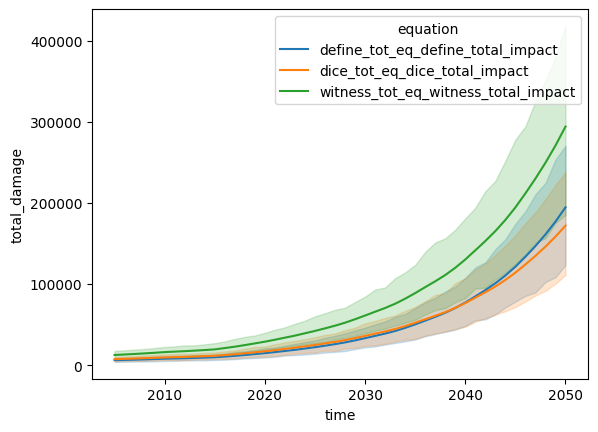

In [8]:
import seaborn as sns
df_melted = df_melted[~df_melted['equation'].isin(['fund_tot_total_damage', 'fund_tot_eq_fund_total_impact', 'fund_tot_eq_monetary_impact', 'dsk_tot_eq_dsk_total_impact'])] 
sns.lineplot(data=df_melted, x='time', y='total_damage', hue='equation', legend=True, estimator='mean')

## Preparing the regression

### With all variables, on a global level

In [60]:
# Group by time, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()
df_regression = df_regression.drop( columns=['REGIONS 35 I'])

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=True)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.apply(pd.to_numeric, errors='coerce')
df_regression = df_regression.dropna()


df_regression

,time,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,total_damage,equation_dice_tot_eq_dice_total_impact,equation_dsk_tot_eq_dsk_total_impact,equation_fund_tot_eq_fund_total_impact,equation_fund_tot_eq_monetary_impact,equation_fund_tot_total_damage,equation_witness_tot_eq_witness_total_impact
2,2005.0,-3.529628,16439.081630,1.714491,0.000000e+00,False,True,False,False,False,False
3,2005.0,-3.529628,16439.081630,1.714491,3.125920e+11,False,False,True,False,False,False
4,2005.0,-3.529628,16439.081630,1.714491,3.125920e+11,False,False,False,True,False,False
5,2005.0,-3.529628,16439.081630,1.714491,9.284357e+07,False,False,False,False,True,False
9,2005.0,-3.500198,10386.656605,1.714491,0.000000e+00,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
957,2050.0,-3.500198,10386.656605,3.153850,3.122788e+08,False,False,False,False,True,False
961,2050.0,1.645664,25185.703445,3.153850,0.000000e+00,False,True,False,False,False,False
962,2050.0,1.645664,25185.703445,3.153850,1.126288e+12,False,False,True,False,False,False
963,2050.0,1.645664,25185.703445,3.153850,1.126288e+12,False,False,False,True,False,False


## Checking some hypothesis on the dataset

We want to check the colinearity of our variables. To do so, we compute the correleation matrix, which computes two by two the correlation between multiple variables. We then represent it in the shape of a heatamp.

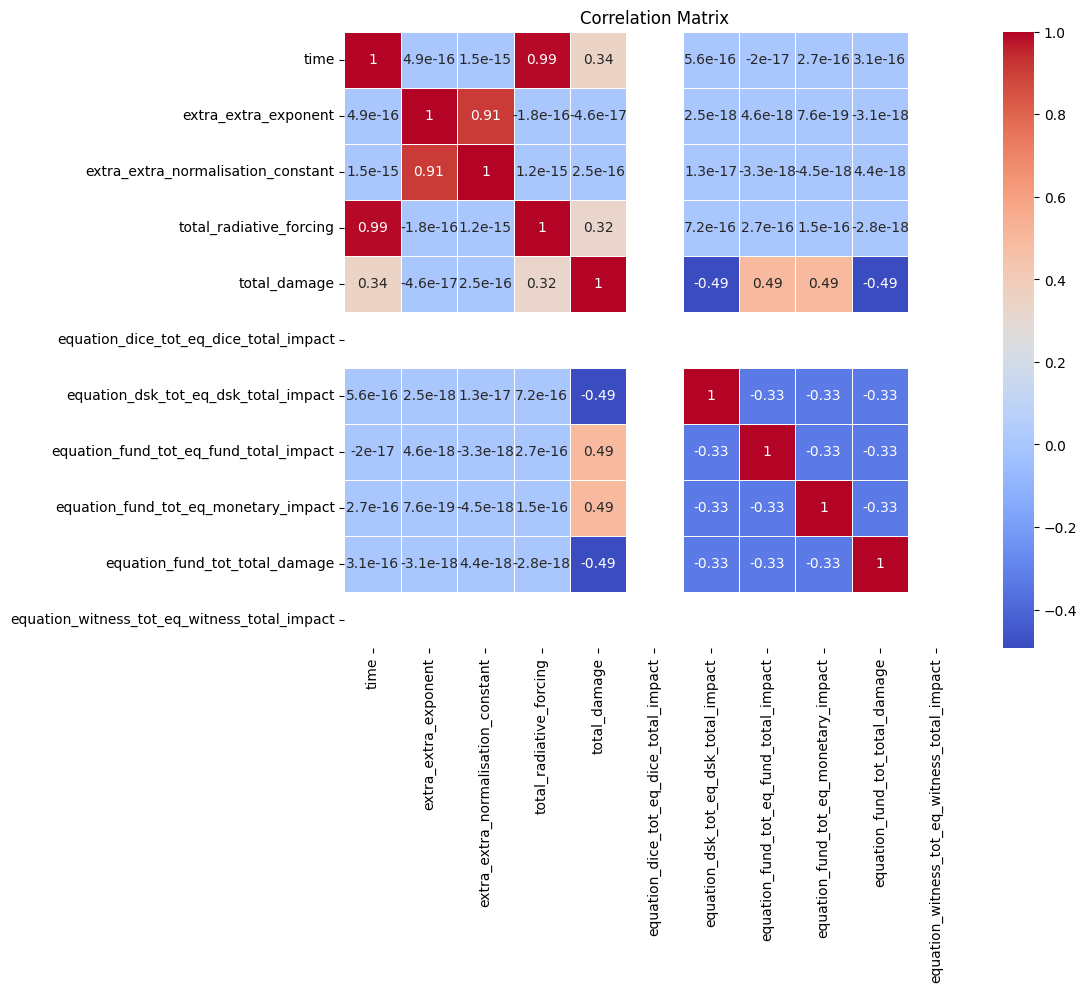

In [56]:
corr_matrix = df_regression.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We now want to visualize pair plots.

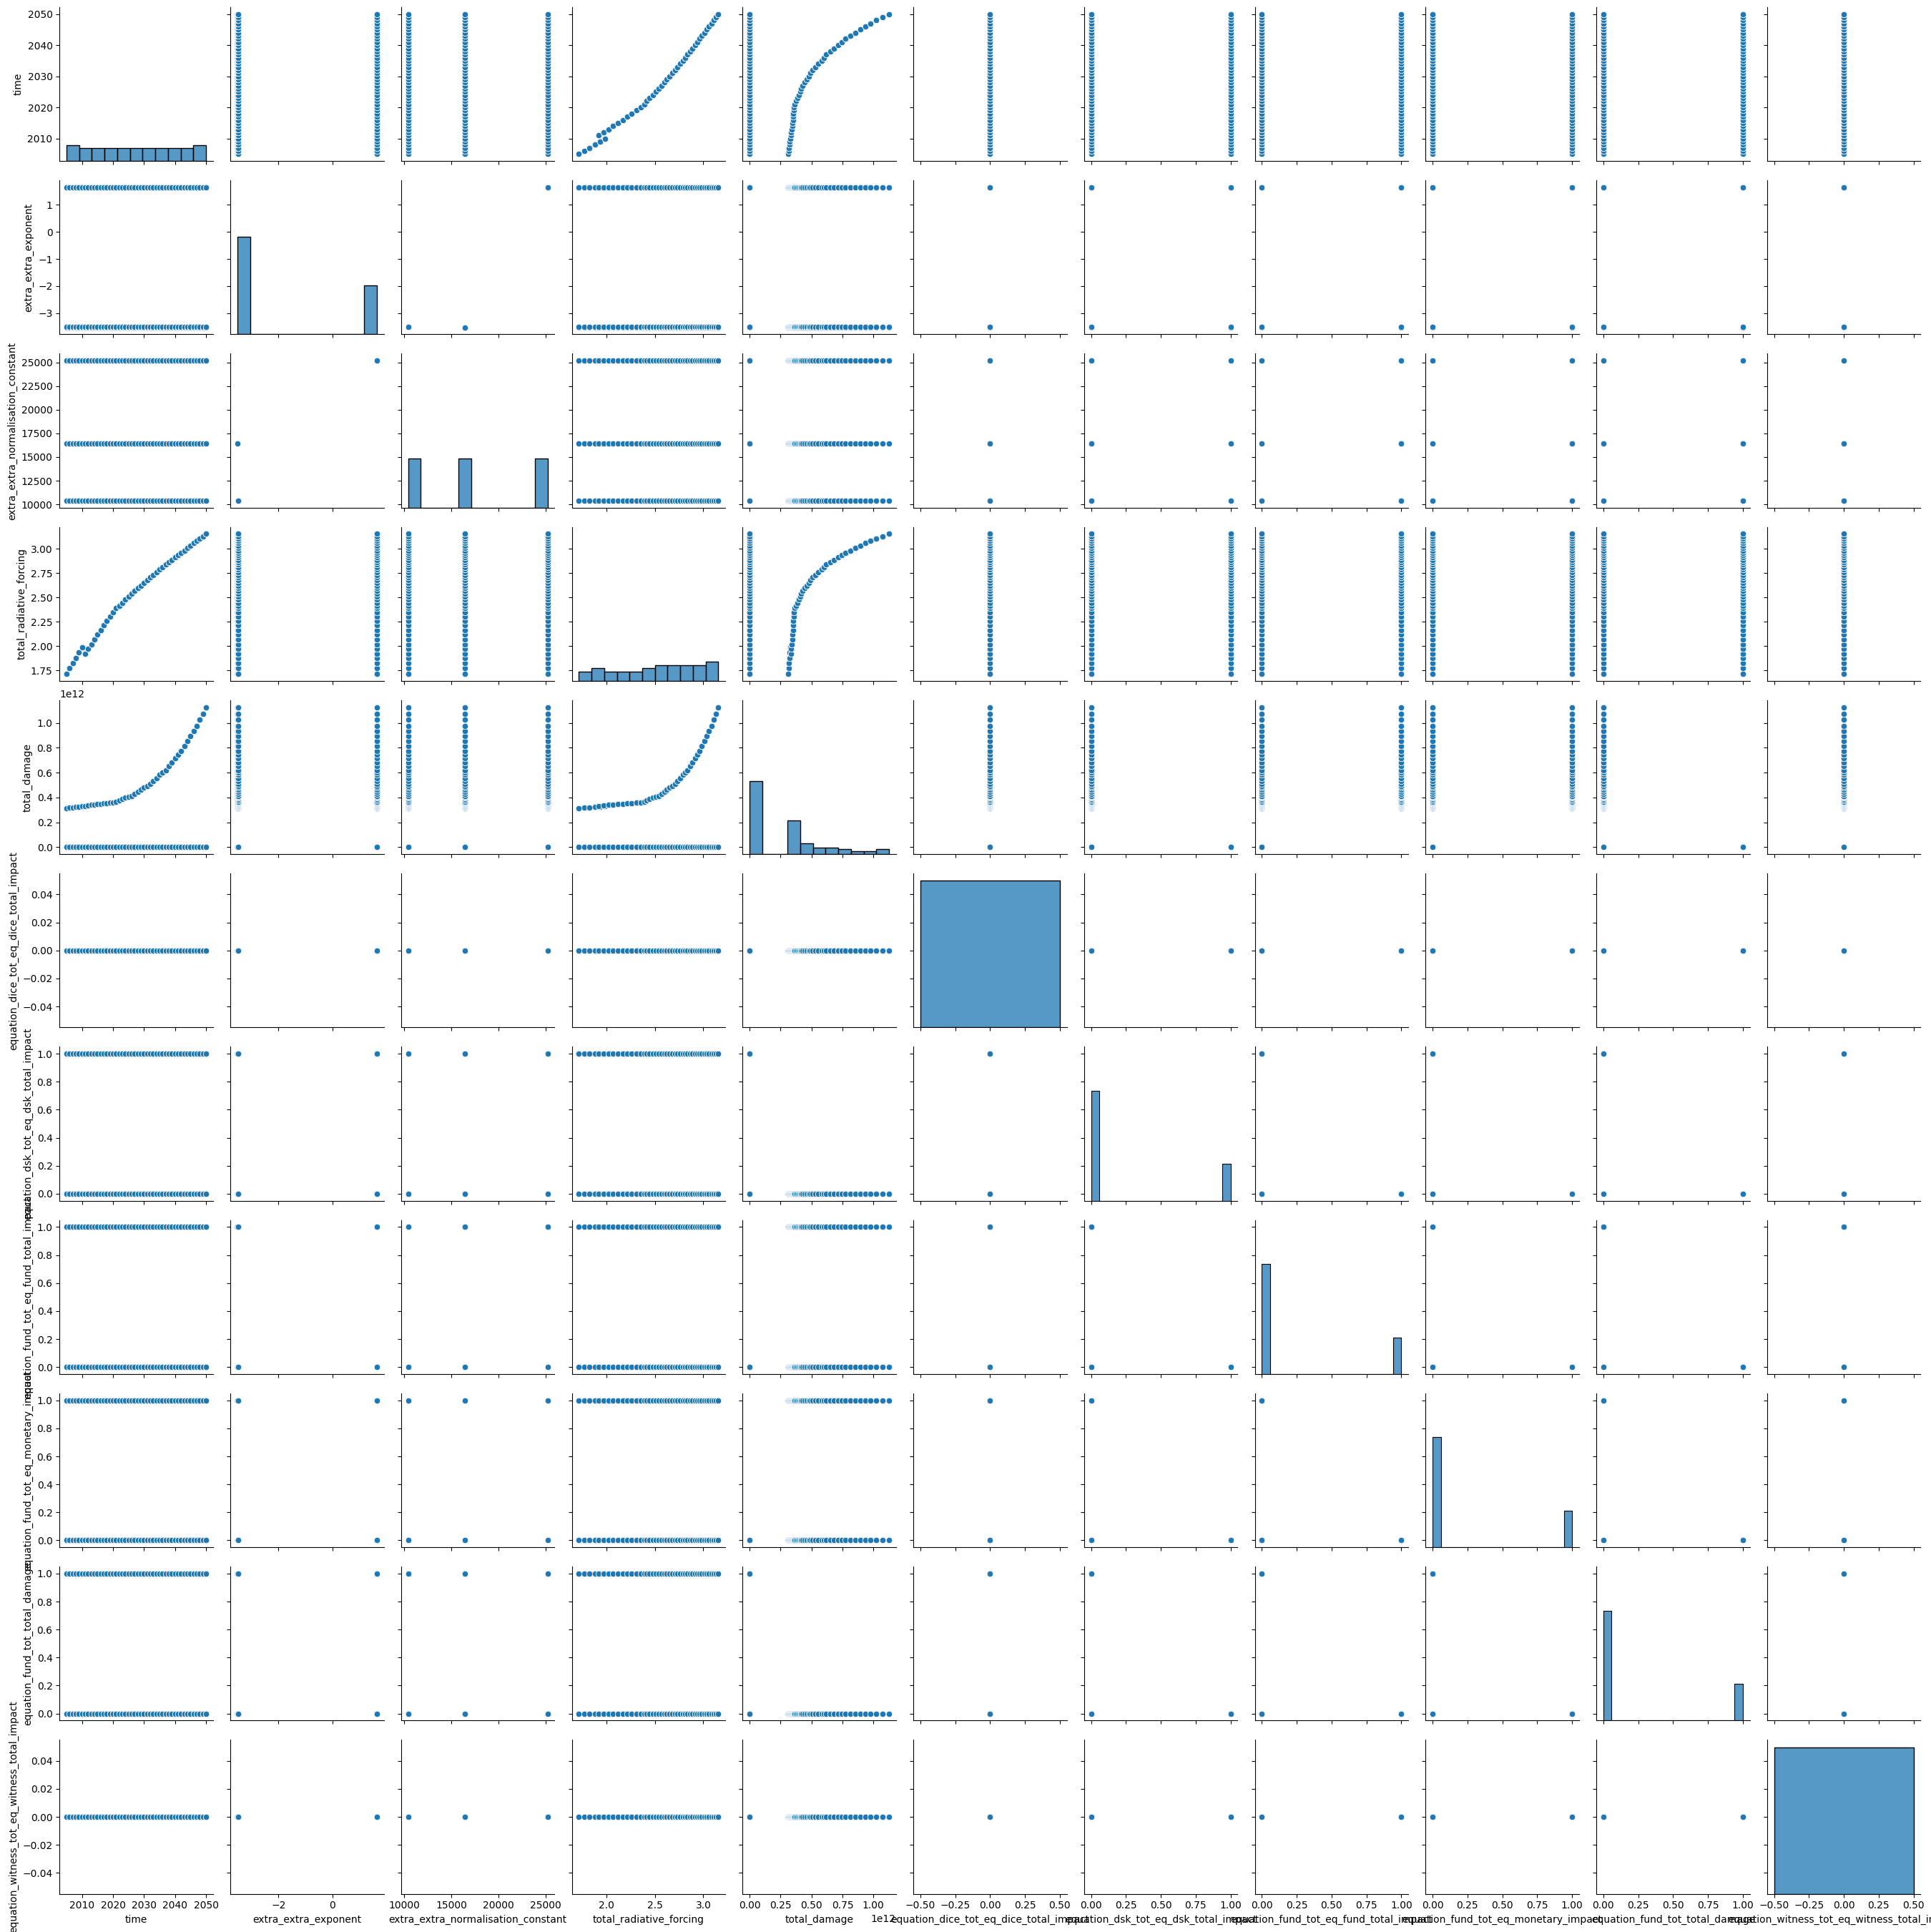

In [61]:
sns.pairplot(df_regression)

## Doing the regression

In [35]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation', 'REGIONS 35 I'], drop_first=True)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     407.1
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:49:28   Log-Likelihood:            -1.5692e+05
No. Observations:               12006   AIC:                         3.139e+05
Df Residuals:                   11971   BIC:                         3.142e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         -3.22e+07   1.26e+06    -25.599      0.000   -3.47e+07   -2.97e+07
time                                          1.697e+04    667.869     25.412      0.000    1.57e+04    1.83e+04
extra_extra_exponent                         -1.116e-09   1048.928  -1.06e-12      1.000   -2056.070    2056.070
extra_extra_normalisation_constant           -9.207e-11      0.420  -2.19e-10      1.000      -0.823       0.823
total_radiative_forcing                       -4.18e+05   2.12e+04    -19.747      0.000   -4.59e+05   -3.76e+05
equation_dice_tot_eq_dice_total_impact        -632.5044   2570.480     -0.246      0.806   -5671.063    4406.054
equation_witness_tot_eq_witness_total_impact  3.325e+04   2570.480     12.935      0.000    2.82e+04    3.83e+04
REGIONS 35 I_BELGIUM                         -1.164e+06   4.37e+04    -26.615      0.000   -1.25e+06   -1.08e+06
REGIONS 35 I_BULGARIA                        -1.169e+06   4.37e+04    -26.733      0.000   -1.25e+06   -1.08e+06
REGIONS 35 I_CHINA                           -7.735e+05   4.37e+04    -17.690      0.000   -8.59e+05   -6.88e+05
REGIONS 35 I_CROATIA                         -1.169e+06   4.37e+04    -26.738      0.000   -1.25e+06   -1.08e+06
REGIONS 35 I_CYPRUS                           -1.17e+06   4.37e+04    -26.752      0.000   -1.26e+06   -1.08e+06
REGIONS 35 I_CZECH REPUBLIC                  -1.166e+06   4.37e+04    -26.669      0.000   -1.25e+06   -1.08e+06
REGIONS 35 I_DENMARK                         -1.167e+06   4.37e+04    -26.680      0.000   -1.25e+06   -1.08e+06
REGIONS 35 I_EASOC                           -9.317e+05   4.37e+04    -21.309      0.000   -1.02e+06   -8.46e+05
REGIONS 35 I_ESTONIA                          -1.17e+06   4.37e+04    -26.748      0.000   -1.26e+06   -1.08e+06
REGIONS 35 I_FINLAND                         -1.167e+06   4.37e+04    -26.700      0.000   -1.25e+06   -1.08e+06
REGIONS 35 I_FRANCE                          -1.137e+06   4.37e+04    -26.011      0.000   -1.22e+06   -1.05e+06
REGIONS 35 I_GERMANY                         -1.119e+06   4.37e+04    -25.588      0.000    -1.2e+06   -1.03e+06
REGIONS 35 I_GREECE                          -1.168e+06   4.37e+04    -26.708      0.000   -1.25e+06   -1.08e+06
REGIONS 35 I_HUNGARY                         -1.168e+06   4.37e+04    -26.702      0.000   -1.25e+06   -1.08e+06
REGIONS 35 I_INDIA                           -9.938e+05   4.37e+04    -22.729      0.000   -1.08e+06   -9.08e+05
REGIONS 35 I_IRELAND                         -1.165e+06   4.37e+04    -26.653      0.000   -1.25e+06   -1.08e+06
REGIONS 35 I_ITALY                           -2.345e-07   5.25e-08     -4.467      0.000   -3.37e-07   -1.32e-07
REGIONS 35 I_LATAM              